In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
import random
class KMeans:
    def __init__(self,n_clusters=2,max_iter=300):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=None
    def fit(self,X):
        random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids=X[random_index]
        for i in range(self.max_iter):
            cluster_group=self.assign_clusters(X)
            self.centroids=[]
            self.centroids=self.move_centroids(X,cluster_group)
        return cluster_group
    def move_centroids(self,X,cluster_group):
        new_centroid=[]
        cluster_type=np.unique(cluster_group)
        for type in cluster_type:
            new_centroid.append(X[cluster_group==type].mean(axis=0))
        return np.array(new_centroid)

    def assign_clusters(self,X):
        cluster_group=[]
        for row in X:
            distances=[]
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(centroid-row,centroid-row)))
            min_distance=min(distances)
            index_pos=distances.index(min_distance)
            cluster_group.append(index_pos)
        return np.array(cluster_group)
        

        

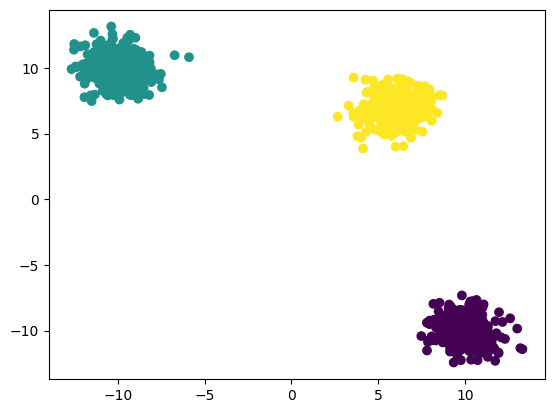

In [24]:
from sklearn.datasets import make_blobs
centroids=[[-10,10],[10,-10],[6,7]]
km=KMeans(n_clusters=3)
X,y=make_blobs(n_samples=1000,centers=centroids,n_features=2,random_state=2)
y=km.fit(X)
plt.scatter(X[:,0],X[:,1],c=y)

Hence Implemented KMeans Successfully
